Параметры прямых: (k, s_k, b, s_b) (Па)
Нагревание:
	-4724.575336216133	47.80091581719033	24.0139686933749	0.003167696445058235
Охлаждение:
	-4479.37289385458	74.92495795119746	23.24289047948184	0.005049371535174141
Нагревание & Охлаждение:
	-4656.814415772988	65.00769600191803	23.80249340165422	0.004340878990005951
L:
Нагрев 39261.221043956066 +- 397.22561044085165
Охлаждение 37223.588747931564 +- 622.6264005744509
Нагрев и охлаждение 38698.12779507353 +- 540.2139537759389
Параметры парабол: (a, b, c) в кПа
Нагревание:
	0.006509015368042962	-3.704488793969299	529.3722331590034
Охлаждение:
	0.004407911046248364	-2.437331766006159	338.5631103036963
Нагревание & Охлаждение:
	0.005906877237185235	-3.340885919679742	474.5554327150345
38528.73148333805
36769.54621105296
38150.556033141984


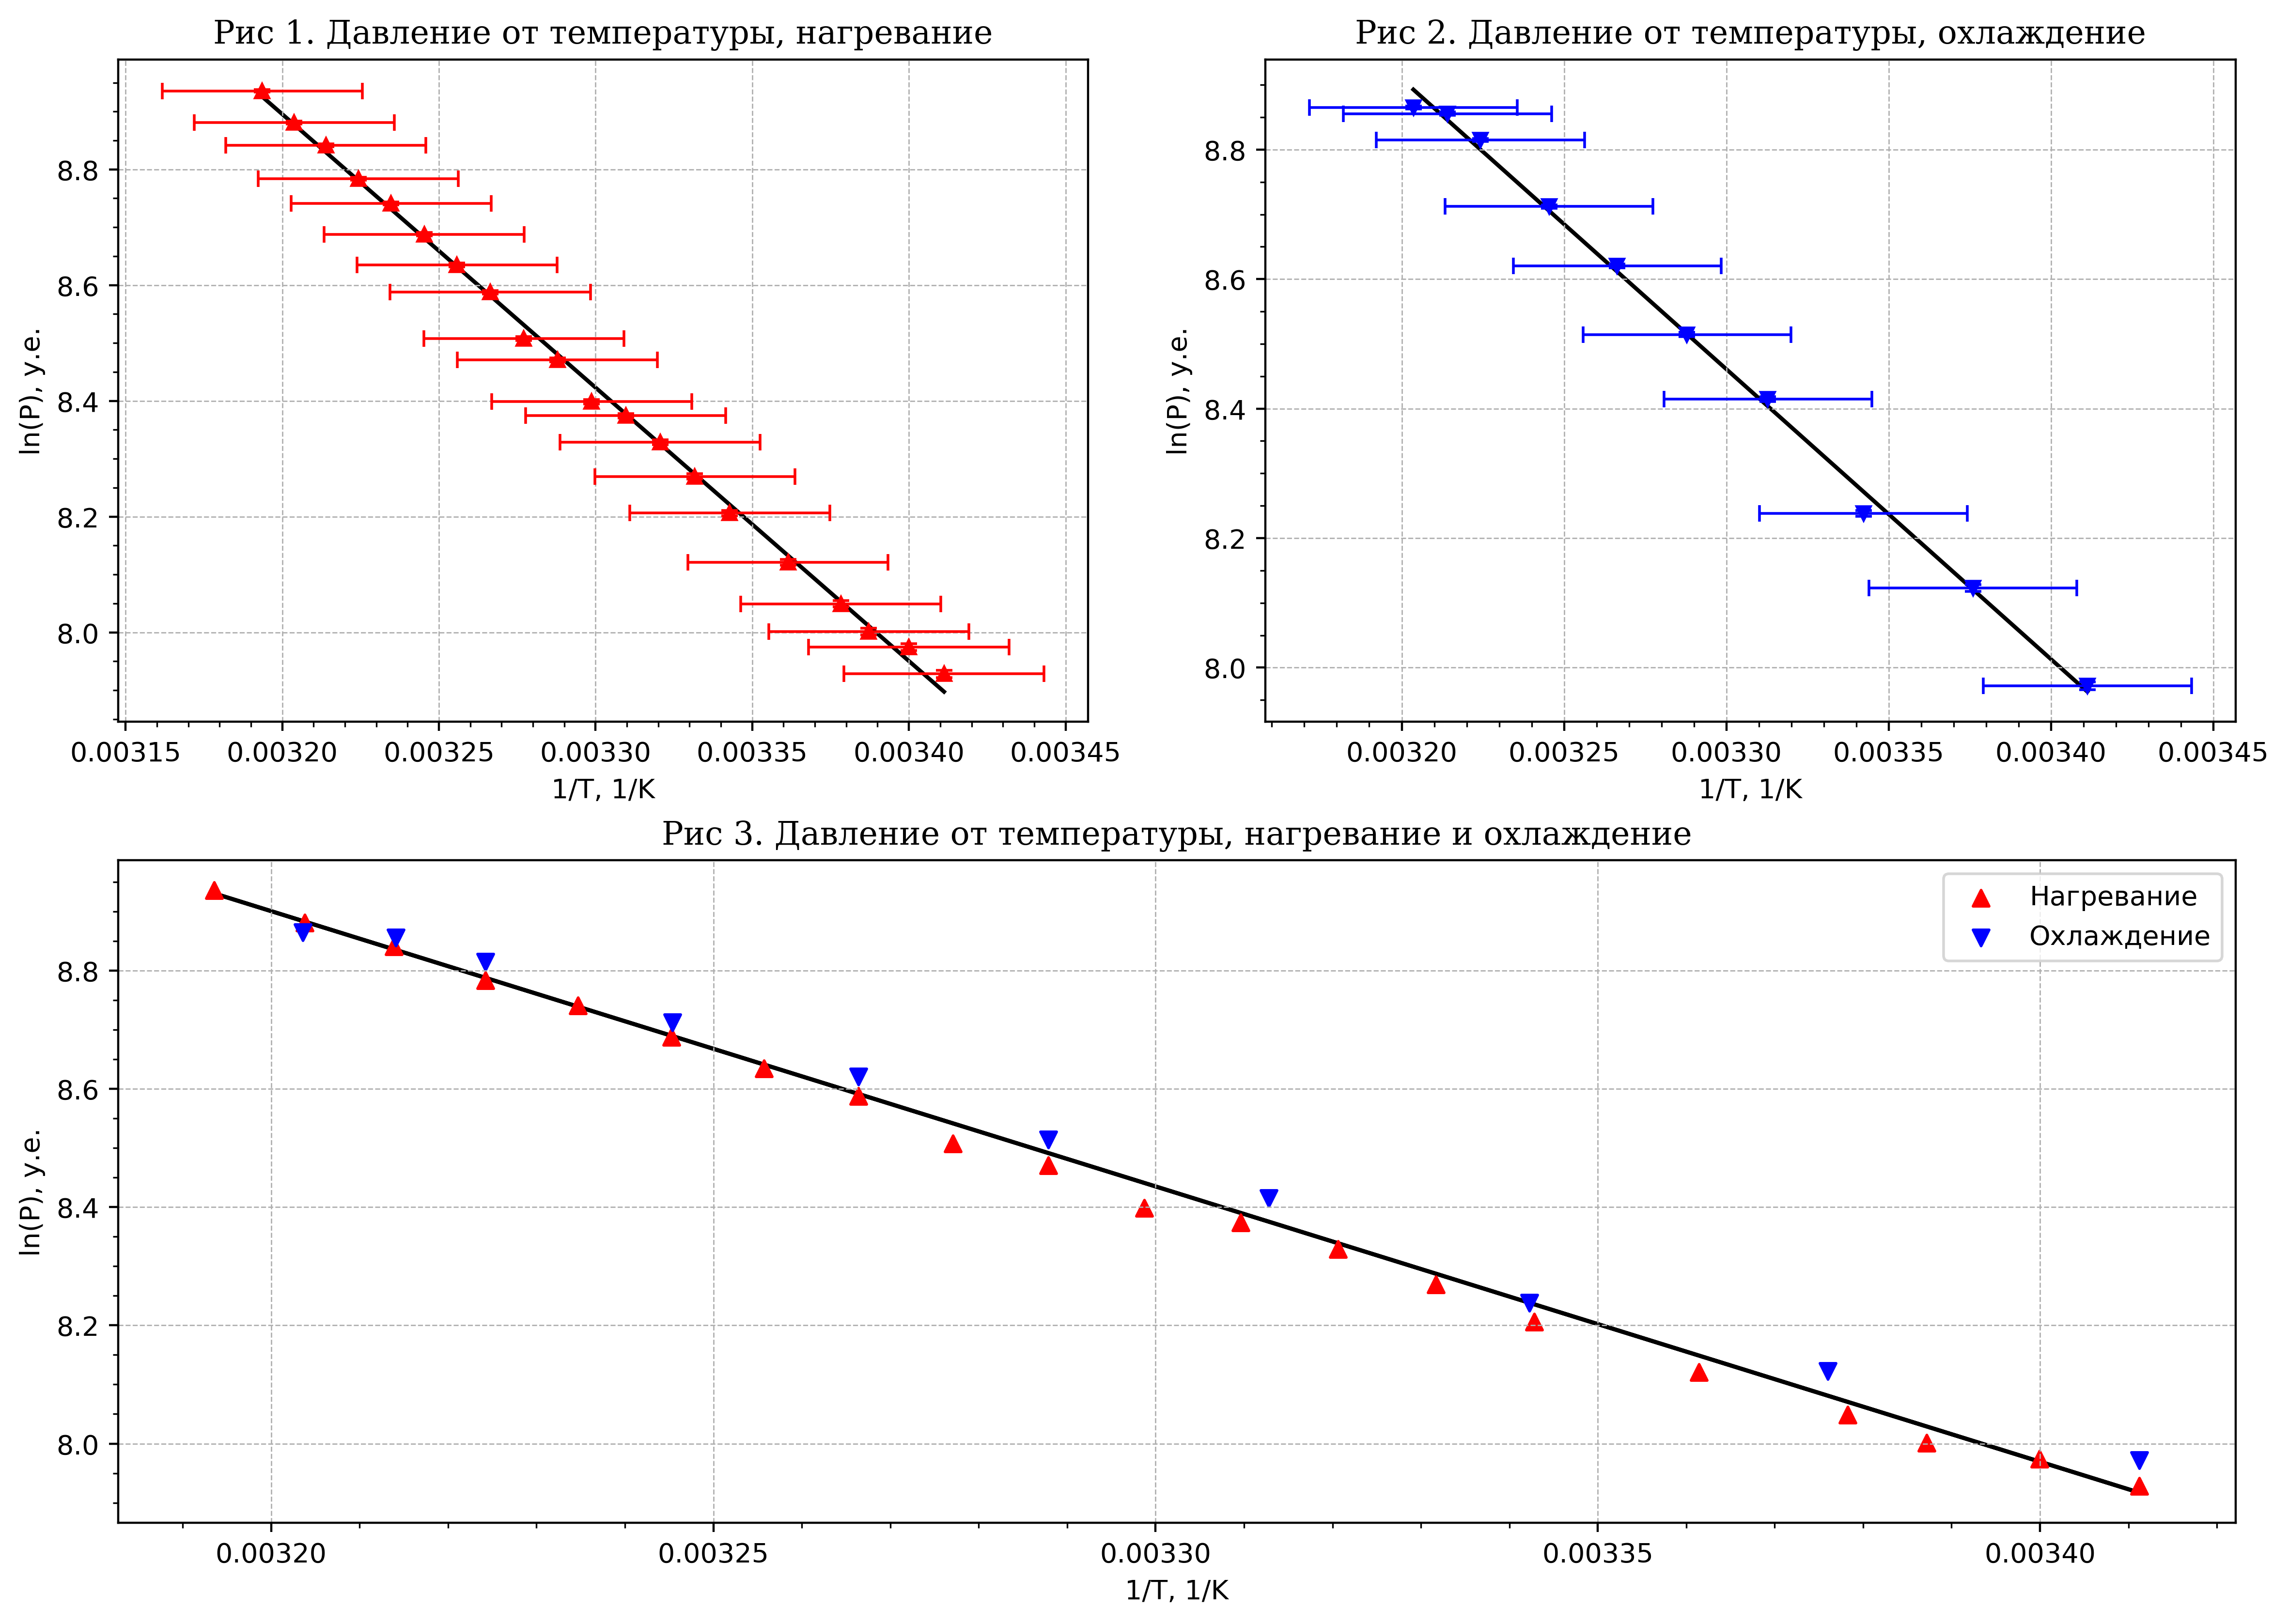

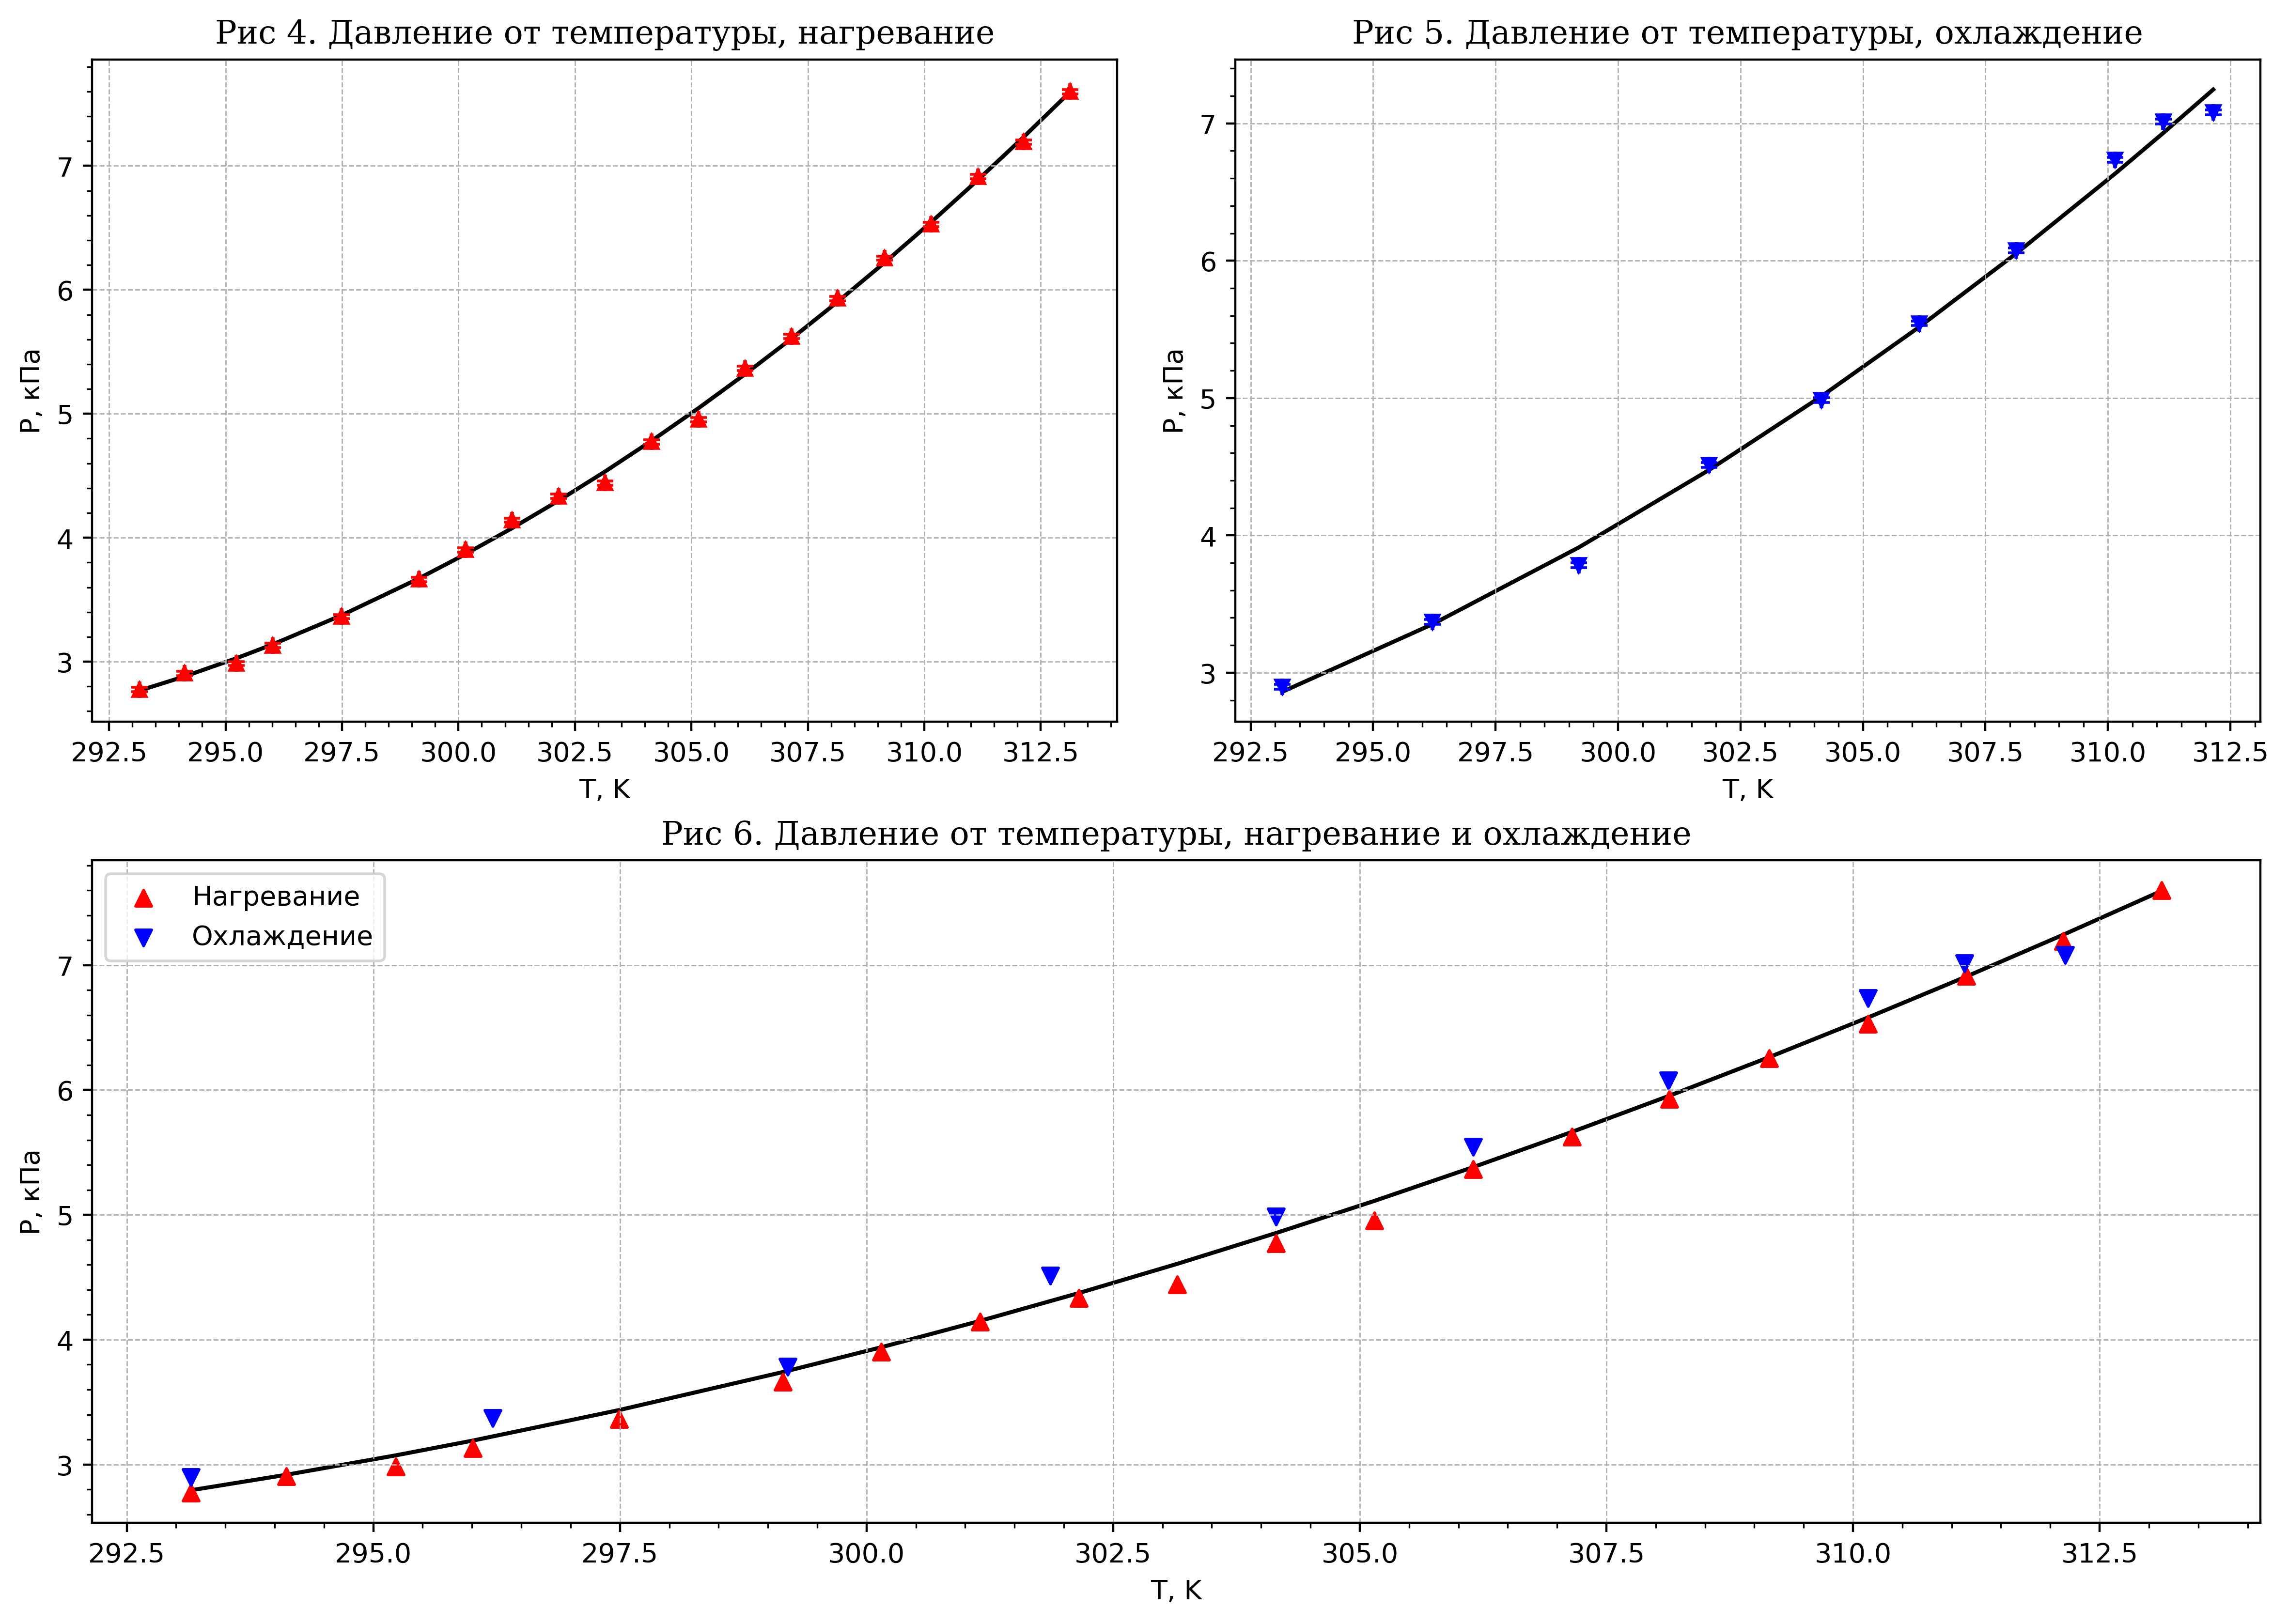

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def lin_ls(x, y, through_null=False):
    if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
        if len(x) != len(y):
            raise ValueError("Incompatible x and y vectors. They must have the same length.")
        if through_null:
            k = np.mean(x * y) / np.mean(x * x)
            s_k = np.sqrt(1 / len(x)) * np.sqrt(np.mean(y * y) / np.mean(x * x) - k ** 2)
            return k, s_k
        else:
            xy = np.mean(x * y)
            x1y = np.mean(x) * np.mean(y)
            x2 = np.mean(x * x)
            x12 = np.mean(x) ** 2
            y2 = np.mean(y * y)
            y12 = np.mean(y) ** 2
            k = (xy - x1y) / (x2 - x12)
            b = np.mean(y) - k * np.mean(x)
            s_k = np.sqrt(1 / len(x)) * np.sqrt((y2 - y12) / (x2 - x12) - k ** 2)
            s_b = s_k * np.sqrt(x2 - x12)
            return k, s_k, b, s_b
    else:
        raise ValueError("Invalid x or/and y type. Must be numpy.ndarray.")

T_UP = np.array( [20.00, 20.97, 22.08, 22.86, 24.34, 26.00, 27.00, 28.00, 29.00, 30.00, 31.00, 32.00, 33.00, 34.00, 34.99, 36.00, 37.00,
              38.00, 38.98, 39.98] ) + 273.15
dH_UP = np.array( [20.87, 21.85, 22.45, 23.55, 25.3, 27.55, 29.35, 31.15, 32.6, 33.4, 35.9, 37.25, 40.35, 42.3, 44.6, 47.05, 49.1, 
                   52, 54.1, 57.15] )
T_DOWN = np.array( [39.00, 37.98, 37.00, 34.98, 33, 31.00, 28.71, 26.05, 23.06, 20.00] ) + 273.15
dH_DOWN = np.array( [53.25, 52.75, 50.65, 45.7, 41.7, 37.5, 33.95, 28.45, 25.35, 21.8] )

P_UP = (dH_UP / 1e3) * 9.815 * 13546
P_DOWN = (dH_DOWN / 1e3) * 9.815 * 13546

### Figure setup
fig1 = plt.figure(figsize=(11.693, 8.268), dpi=400, layout='constrained')
spec = fig1.add_gridspec(2, 2)
ax_up = fig1.add_subplot(spec[0, 0])
ax_down = fig1.add_subplot(spec[0, 1])
ax_common = fig1.add_subplot(spec[1, :])
[ax.minorticks_on() for ax in fig1.axes]
[ax.grid(which='major', linestyle='--', linewidth=0.5) for ax in fig1.axes]
[ax.set_xlabel('1/T, 1/K') for ax in fig1.axes]
[ax.set_ylabel('ln(P), у.е.') for ax in fig1.axes]
font = {'fontname': 'DejaVu Serif'}
####

### ТОЧКИ (давление, температура)
sigma_P = 17.28 # from my lab notebook
Y_ERR_UP = sigma_P / P_UP
ax_up.errorbar(1/T_UP, np.log(P_UP), fmt='r^', linewidth=0, markersize=5, elinewidth=1, 
    xerr=0.01/np.amax(T_UP), yerr=Y_ERR_UP,
    capsize=3, zorder=3
)
ax_up.set_title('Рис 1. Давление от температуры, нагревание', **font)

Y_ERR_DOWN = sigma_P / P_DOWN
ax_down.errorbar(1/T_DOWN, np.log(P_DOWN), fmt='bv', linewidth=0, markersize=5, elinewidth=1, 
    xerr=0.01/np.amax(T_DOWN), yerr=Y_ERR_DOWN,
    capsize=3, zorder=3
)
ax_down.set_title('Рис 2. Давление от температуры, охлаждение', **font)

ax_common.scatter(1/T_UP, np.log(P_UP), c='r', marker='^', label='Нагревание')
ax_common.scatter(1/T_DOWN, np.log(P_DOWN), c='b', marker='v', label='Охлаждение')
ax_common.set_title('Рис 3. Давление от температуры, нагревание и охлаждение', **font)
ax_common.legend()
####

### МНК (для трёх рисунков)
(k_up, s_k_up, b_up, s_b_up) = lin_ls(1/T_UP, np.log(P_UP), through_null=False)
(k_down, s_k_down, b_down, s_b_down) = lin_ls(1/T_DOWN, np.log(P_DOWN), through_null=False)
T_COMMON = np.array( [20.00, 20.97, 22.08, 22.86, 24.34, 26.00, 27.00, 28.00, 29.00, 30.00, 31.00, 32.00, 33.00, 34.00, 34.99, 36.00, 37.00,
              38.00, 38.98, 39.98] + [39.00, 37.98, 37.00, 34.98, 33, 31.00, 28.71, 26.05, 23.06, 20.00] ) + 273.15
P_COMMON = (np.array( [20.87, 21.85, 22.45, 23.55, 25.3, 27.55, 29.35, 31.15, 32.6, 33.4, 35.9, 37.25, 40.35, 42.3, 44.6, 47.05, 49.1, 
                   52, 54.1, 57.15] + [53.25, 52.75, 50.65, 45.7, 41.7, 37.5, 33.95, 28.45, 25.35, 21.8])) * 9.815 * (13546) / 1e3
(k_common, s_k_common, b_common, s_b_common) = lin_ls(1/T_COMMON, np.log(P_COMMON), through_null=False)
ax_up.plot(1/T_UP, (1/T_UP) * k_up + b_up, color='k', zorder=-1)
ax_down.plot(1/T_DOWN, (1/T_DOWN) * k_down + b_down, color='k', zorder=-1)
ax_common.plot(1/T_COMMON, (1/T_COMMON) * k_common + b_common, color='k', zorder=-1)
print('Параметры прямых: (k, s_k, b, s_b) (Па)')
print('Нагревание:\n', k_up, s_k_up, b_up, s_b_up, sep='\t')
print('Охлаждение:\n', k_down, s_k_down, b_down, s_b_down, sep='\t')
print('Нагревание & Охлаждение:\n', k_common, s_k_common, b_common, s_b_common, sep='\t')
####

print('L:')
print('Нагрев', -8.31 * k_up, '+-', 8.31 * s_k_up)
print('Охлаждение', -8.31 * k_down, '+-', 8.31 * s_k_down)
print('Нагрев и охлаждение', -8.31 * k_common, '+-', 8.31 * s_k_common)

### Figure setup
fig2 = plt.figure(figsize=(11.693, 8.268), dpi=400, layout='constrained')
spec = fig2.add_gridspec(2, 2)
ax_up = fig2.add_subplot(spec[0, 0])
ax_down = fig2.add_subplot(spec[0, 1])
ax_common = fig2.add_subplot(spec[1, :])
[ax.minorticks_on() for ax in fig2.axes]
[ax.grid(which='major', linestyle='--', linewidth=0.5) for ax in fig2.axes]
[ax.set_xlabel('T, K') for ax in fig2.axes]
[ax.set_ylabel('P, кПа') for ax in fig2.axes]
font = {'fontname': 'DejaVu Serif'}
####
P_DOWN /= 1e3
P_UP /= 1e3
### ТОЧКИ (давление, температура)
sigma_P = 17.28 / 1e3 # from lab notebook
Y_ERR_UP = sigma_P
ax_up.errorbar(T_UP, P_UP, fmt='r^', linewidth=0, markersize=5, elinewidth=1, 
    xerr=0.01, yerr=Y_ERR_UP,
    capsize=3, zorder=3
)
ax_up.set_title('Рис 4. Давление от температуры, нагревание', **font)

Y_ERR_DOWN = sigma_P
ax_down.errorbar(T_DOWN, P_DOWN, fmt='bv', linewidth=0, markersize=5, elinewidth=1, 
    xerr=0.01, yerr=Y_ERR_DOWN,
    capsize=3, zorder=3
)
ax_down.set_title('Рис 5. Давление от температуры, охлаждение', **font)

ax_common.scatter(T_UP, P_UP, c='r', marker='^', label='Нагревание')
ax_common.scatter(T_DOWN, P_DOWN, c='b', marker='v', label='Охлаждение')
ax_common.set_title('Рис 6. Давление от температуры, нагревание и охлаждение', **font)
ax_common.legend()
####

### МНК (для трёх рисунков)
(k_up, s_k_up, b_up, s_b_up) = lin_ls(T_UP, P_UP, through_null=False)
(k_down, s_k_down, b_down, s_b_down) = lin_ls(T_DOWN, P_DOWN, through_null=False)
T_COMMON = np.array( [20.00, 20.97, 22.08, 22.86, 24.34, 26.00, 27.00, 28.00, 29.00, 30.00, 31.00, 32.00, 33.00, 34.00, 34.99, 36.00, 37.00,
              38.00, 38.98, 39.98] + [39.00, 37.98, 37.00, 34.98, 33, 31.00, 28.71, 26.05, 23.06, 20.00] ) + 273.15
P_COMMON = (np.array( [20.87, 21.85, 22.45, 23.55, 25.3, 27.55, 29.35, 31.15, 32.6, 33.4, 35.9, 37.25, 40.35, 42.3, 44.6, 47.05, 49.1, 
                   52, 54.1, 57.15] + [53.25, 52.75, 50.65, 45.7, 41.7, 37.5, 33.95, 28.45, 25.35, 21.8] )) * 9.815 * (13546) / 1e3
P_COMMON /= 1e3
#(k_common, s_k_common, b_common, s_b_common) = lin_ls(T_COMMON, P_COMMON, through_null=False)
#ax_up.plot(T_UP, (T_UP) * k_up + b_up, color='k', zorder=-1)
#ax_down.plot(T_DOWN, (T_DOWN) * k_down + b_down, color='k', zorder=-1)
#ax_common.plot(T_COMMON, (T_COMMON) * k_common + b_common, color='k', zorder=-1)
####

(a_up, b_up, c_up) = np.polyfit(T_UP, P_UP, 2)
ax_up.plot(T_UP, a_up * T_UP * T_UP + b_up * T_UP + c_up, c='k', zorder=-1)
(a_down, b_down, c_down) = np.polyfit(T_DOWN, P_DOWN, 2)
ax_down.plot(T_DOWN, a_down * T_DOWN * T_DOWN + b_down * T_DOWN + c_down, c='k', zorder=-1)
(a_common, b_common, c_common) = np.polyfit(T_COMMON, P_COMMON, 2)
ax_common.plot(T_UP, a_common * T_UP * T_UP + b_common * T_UP + c_common, c='k', zorder=-1)

print('Параметры парабол: (a, b, c) в кПа')
print('Нагревание:\n', a_up, b_up, c_up, sep='\t')
print('Охлаждение:\n', a_down, b_down, c_down, sep='\t')
print('Нагревание & Охлаждение:\n', a_common, b_common, c_common, sep='\t')

L_up = 8.31 * T_UP * T_UP * (2 * a_up * T_UP + b_up) / P_UP
print(np.mean(L_up))
L_down = 8.31 * T_DOWN * T_DOWN * (2 * a_down * T_DOWN + b_down) / P_DOWN
print(np.mean(L_down))
L_common = 8.31 * T_COMMON * T_COMMON * (2 * a_common * T_COMMON + b_common) / P_COMMON
print(np.mean(L_common))